In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [43]:
data = pd.read_csv('sms_senior.csv', delimiter=',', encoding='mbcs')[['Date', 'IsSpam']]

In [44]:
data

,Date,IsSpam
0,2017-01-01 00:08:00,no
1,2017-01-01 00:19:00,no
2,2017-01-01 01:53:00,yes
3,2017-01-01 02:14:00,no
4,2017-01-01 02:25:00,no
...,...,...
5569,2017-03-31 21:13:00,no
5570,2017-03-31 22:19:00,no
5571,2017-03-31 23:15:00,yes
5572,2017-03-31 23:32:00,no


In [47]:
data['Date'] = data['Date'].map(lambda c: pd.to_datetime(c)).map(lambda x: 100 * x.year + x.month)

In [48]:
data

,Date,IsSpam
0,201701,no
1,201701,no
2,201701,yes
3,201701,no
4,201701,no
...,...,...
5569,201703,no
5570,201703,no
5571,201703,yes
5572,201703,no


In [65]:
serie = data.groupby(['Date', 'IsSpam'])['IsSpam'].count()

In [66]:
serie

Date    IsSpam
201701  no        1687
        yes        266
201702  no        1512
        yes        244
201703  no        1628
        yes        237
Name: IsSpam, dtype: int64

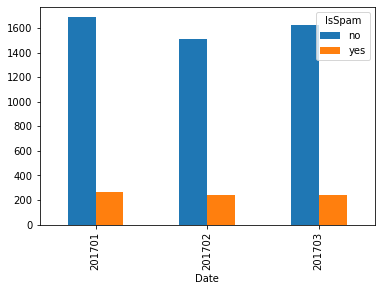

In [68]:
serie.unstack().plot(kind='bar')